In [1]:
# 📊 ANÁLISE DE VENDAS - PROJETO PORTFÓLIO
# Autor: Samuel Maia
# Data: [data de hoje]

# 1. IMPORTAR BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [2]:
# 2. CARREGAR DADOS
caminho = '../dados/sales_data_sample.csv'
df = pd.read_csv(caminho, encoding='latin-1')

print("📋 DIMENSÕES DO DATASET:")
print(f"Linhas: {df.shape[0]}, Colunas: {df.shape[1]}")

print("\n📄 PRIMEIRAS LINHAS:")
print(df.head())

print("\n🔍 INFORMAÇÕES:")
print(df.info())

print("\n📊 ESTATÍSTICAS BÁSICAS:")
print(df.describe())

📋 DIMENSÕES DO DATASET:
Linhas: 2823, Colunas: 25

📄 PRIMEIRAS LINHAS:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN

In [3]:
# 🧹 LIMPEZA E PREPARAÇÃO DOS DADOS
print("=" * 50)
print("LIMPEZA DOS DADOS")
print("=" * 50)

# 1. VALORES NULOS
print("\n🔎 VALORES NULOS POR COLUNA:")
valores_nulos = df.isnull().sum()
print(valores_nulos[valores_nulos > 0])

# 2. CONVERTER DATAS
print("\n📅 CONVERTENDO DATAS...")
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
print(f"Primeira data: {df['ORDERDATE'].min()}")
print(f"Última data: {df['ORDERDATE'].max()}")

# 3. CRIAR NOVAS COLUNAS
print("\n➕ CRIANDO NOVAS COLUNAS...")
df['ANO'] = df['ORDERDATE'].dt.year
df['MES'] = df['ORDERDATE'].dt.month
df['DIA'] = df['ORDERDATE'].dt.day
df['MES_ANO'] = df['ORDERDATE'].dt.to_period('M')

print("Colunas disponíveis:")
print(df.columns.tolist())

# 4. VERIFICAR DUPLICADOS
duplicados = df.duplicated().sum()
print(f"\n⚠️  LINHAS DUPLICADAS: {duplicados}")

print("\n✅ LIMPEZA CONCLUÍDA!")

LIMPEZA DOS DADOS

🔎 VALORES NULOS POR COLUNA:
ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64

📅 CONVERTENDO DATAS...
Primeira data: 2003-01-06 00:00:00
Última data: 2005-05-31 00:00:00

➕ CRIANDO NOVAS COLUNAS...
Colunas disponíveis:
['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'ANO', 'MES', 'DIA', 'MES_ANO']

⚠️  LINHAS DUPLICADAS: 0

✅ LIMPEZA CONCLUÍDA!


In [4]:
# 🎨 CONFIGURAÇÕES PARA GRÁFICOS
plt.style.use('seaborn-v0_8-darkgrid')
cores = sns.color_palette("husl", 8)

📊 GRÁFICO 1: VENDAS TOTAIS POR ANO


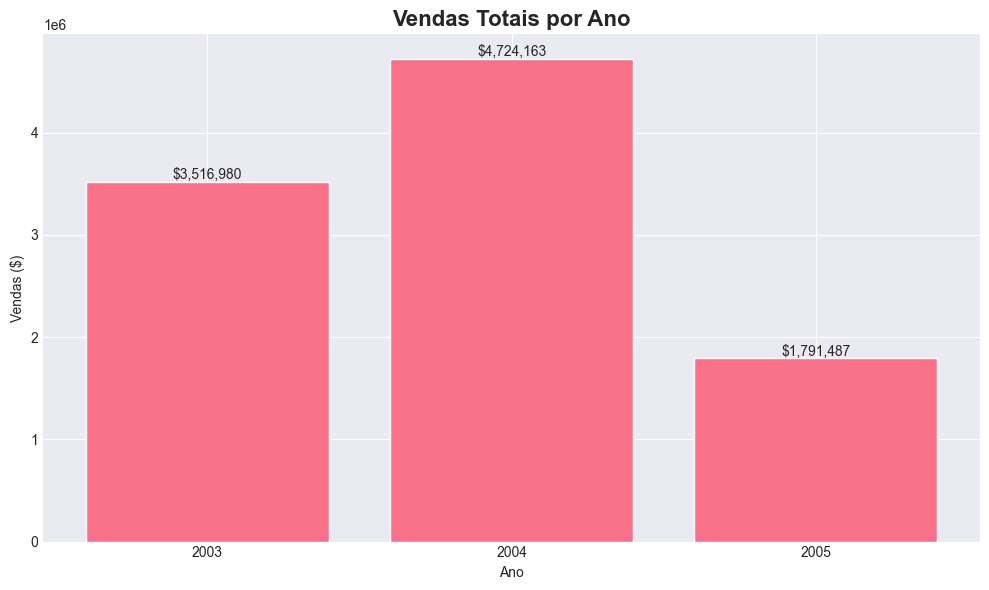


💰 VENDA TOTAL: $10,032,628.85


In [5]:
# 📈 GRÁFICO 1: VENDAS POR ANO
print("📊 GRÁFICO 1: VENDAS TOTAIS POR ANO")

vendas_ano = df.groupby('ANO')['SALES'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(vendas_ano.index.astype(str), vendas_ano.values, color=cores[0])

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.title('Vendas Totais por Ano', fontsize=16, fontweight='bold')
plt.xlabel('Ano')
plt.ylabel('Vendas ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\n💰 VENDA TOTAL: ${vendas_ano.sum():,.2f}")


📊 GRÁFICO 2: TOP 5 CATEGORIAS DE PRODUTOS


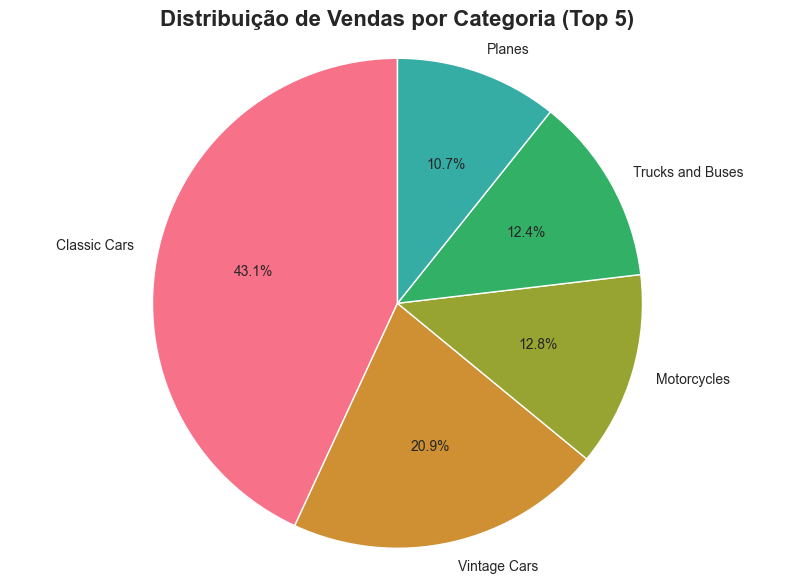


🏆 TOP 3 CATEGORIAS:
1. Classic Cars: $3,919,615.66
2. Vintage Cars: $1,903,150.84
3. Motorcycles: $1,166,388.34


In [6]:
# 🏆 GRÁFICO 2: TOP 5 PRODUTOS MAIS VENDIDOS
print("\n📊 GRÁFICO 2: TOP 5 CATEGORIAS DE PRODUTOS")

top_categorias = df.groupby('PRODUCTLINE')['SALES'].sum().nlargest(5)

plt.figure(figsize=(10, 7))
plt.pie(top_categorias.values, labels=top_categorias.index,
        autopct='%1.1f%%', startangle=90, colors=cores)
plt.title('Distribuição de Vendas por Categoria (Top 5)',
          fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

print("\n🏆 TOP 3 CATEGORIAS:")
for i, (categoria, valor) in enumerate(top_categorias.head(3).items(), 1):
    print(f"{i}. {categoria}: ${valor:,.2f}")


📊 GRÁFICO 3: TENDÊNCIA DE VENDAS MENSAL


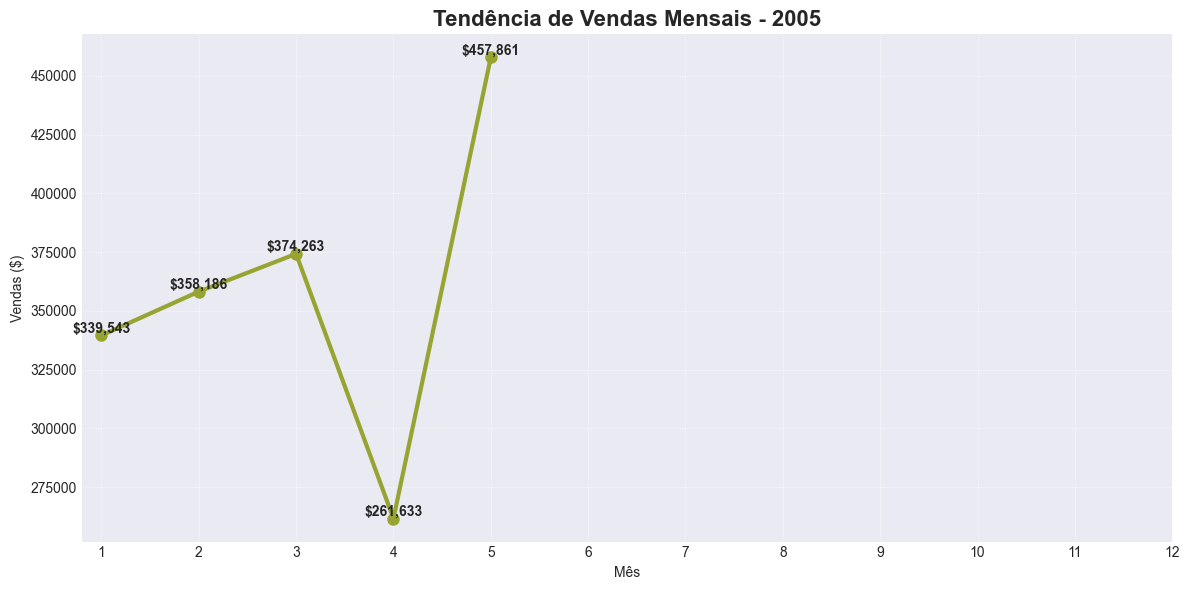


📈 MELHOR MÊS: Mês 5 ($457,861.06)


In [7]:
# 📅 GRÁFICO 3: TENDÊNCIA MENSAL (último ano completo)
print("\n📊 GRÁFICO 3: TENDÊNCIA DE VENDAS MENSAL")

# Pegar último ano completo no dataset
ultimo_ano = df['ANO'].max()
df_ultimo_ano = df[df['ANO'] == ultimo_ano]

vendas_mensal = df_ultimo_ano.groupby('MES')['SALES'].sum()

plt.figure(figsize=(12, 6))
plt.plot(vendas_mensal.index, vendas_mensal.values,
         marker='o', linewidth=3, markersize=8, color=cores[2])

plt.title(f'Tendência de Vendas Mensais - {ultimo_ano}',
          fontsize=16, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Vendas ($)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# Adicionar valor em cada ponto
for x, y in zip(vendas_mensal.index, vendas_mensal.values):
    plt.text(x, y, f'${y:,.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📈 MELHOR MÊS: Mês {vendas_mensal.idxmax()} (${vendas_mensal.max():,.2f})")